<a href="https://colab.research.google.com/github/d-nascimento/analise-de-sentimentos-no-twitter/blob/master/analise_sentimentos_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy textblob matplotlib wordcloud googletrans unidecode

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from googletrans import Translator
from unidecode import unidecode
import seaborn as sns

In [ ]:
##login

In [33]:
#chaves de autenticação (strings)
consumerKey = 'GggfGYt8ztMPbDutNrN3tMwpo'
consumerSecret = 'gDO5Xp31KNlbLuzaz74PTH3e728pkm4eEvLnHVDMpRDS4YIw0J'
accessToken = '794678663346356224-98Nu9T3HIXZLnvhUXR3rQnOasDbrfJX'
accessTokenSecret = '9q7ngqeWEVai9ohyfrBfGRk45ci60jmdiqdDUzfYtSzZj'

In [34]:
#Criando nossa autenticação
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
#"Direcionando" o token de acesso
auth.set_access_token(accessToken, accessTokenSecret) 
#criando o objeto da API usando nossas credenciais
api = tweepy.API(auth, wait_on_rate_limit = True)

In [35]:
#usuário a ser analisado

In [36]:
name_id = '@realDonaldTrump'
language = 'en'

In [39]:
# Fazendo um scrapping dos ultimos 100 tweets
posts = api.user_timeline(screen_name=name_id,
                          count = 100,
                          lang =language,
                          tweet_mode="extended")

In [40]:
#Criando uma lista (usando list comprehension) para inserirmos num DataFrame
df_tweets=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df_tweets.head()

,Tweets
0,Thank you. Will never let you down! https://t....
1,RT @AndrewCMcCarthy: In my Friday evening @NRO...
2,"RT @MZHemingway: NPR, which was a co-conspirat..."
3,RT @rkylesmith: The Russia-Obsessed Media Does...
4,RT @DavidBahnsen: PREVIEW TODAY'S #COVID19 &am...


In [41]:
def limpando_chars(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #removendo @
    text = re.sub('#', '', text) #removendo #
    text = re.sub('RT[\s]+', '', text) # Removendo RT
    text = re.sub('https?:\/\/\S+', '', text) # Removendo hyperlink
    text = re.sub('&amp','', text)# removendo marcação HTML de início
    return text

In [42]:
#limpando os tweets com a função criada
df_tweets['Tweets'] = df_tweets['Tweets'].apply(limpando_chars)

In [43]:
# Função que analisa e obtém a subjetividade
def capture_subjetividade_pt(text):
    return TextBlob(text).sentiment.subjectivity
# Função que analisa e obtém a polaridade
def capture_polaridade_pt(text):
    return  TextBlob(text).sentiment.polarity
def translate_text(text):
        return Translator().translate(unidecode(text)).text
#Traduzindo
if language!= 'en':
    df_tweets['Tweets'] = df_tweets['Tweets'].apply(translate_text)
else:
    pass
# Criar duas colunas de subjetividade e polaridade

df_tweets['Subjetividade'] = df_tweets['Tweets'].apply(capture_polaridade_pt)
df_tweets['Polaridade'] = df_tweets['Tweets'].apply(capture_subjetividade_pt)

# Mostra um novo dataframe com as colunas subjetividade e polaridade
df_tweets.tail()

,Tweets,Subjetividade,Polaridade
94,2020: 13 I just hope your registered as a Re...,-0.155556,0.288889
95,: Leave Democrat cities. Let them rot. The med...,-0.100000,0.200000
96,: Join President as he watches Pastor Sam Rod...,0.136364,0.454545
97,: From President on the passing of his brothe...,1.000000,0.300000
98,: LIVE: President holds a news conference,0.136364,0.500000


In [44]:
#-1 negativo
#0 neutro
#1 positivo
def gerar_analise(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutro'
    else:
        return 'Positivo'
df_tweets['Analise'] = df_tweets['Polaridade'].apply(gerar_analise)

In [45]:
# Printando apenas os tweets positivos 
print('Printing positive tweets:\n')
j=1
sortedDF = df_tweets.sort_values(by=['Polaridade']) #ordenando os tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analise'][i] == 'Positivo'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) Thank you. Will never let you down! 

2) : In my Friday evening  Corner column on Clinesmith’s Russiagate guilty plea, some memories of the Schiff Memo and t…

3) : NPR, which was a co-conspirator in the Russia collusion hoax, redefines Clinesmith pleading guilty to falsifying evidence…

4) : The Russia-Obsessed Media Does Its Best to Ignore Clinesmith’s Guilty Plea 

5) : AND THAT’S THE WAY IT IS...
Thousands of Seattle Democrats gather to demand mail-in voting because it’s too dangerous to…

6) : Michael Moore, just now on MSNBC, said he was “shocked” that Biden didn’t “swing to the right” and pick Susan Rice, and inst…

7) : Democrats should be deeply embarrassed that their leadership has embraced conspiratorial claims about the USPS. 

8) : Coumo "Our way worked in New York" Seriously?!?! I don't want any part of that way... 

9) : Hey  did Donald Trump make you keep  schools open as long as you did? Did Trump make you keep the subways open w…

10) : W

In [46]:
# Printando apenas os tweets negativos 
print('Printing negative tweets:\n')
j=1
sortedDF = df_tweets.sort_values(by=['Polaridade'],ascending=False) #ordenando os tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analise'][i] == 'Negativo'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:



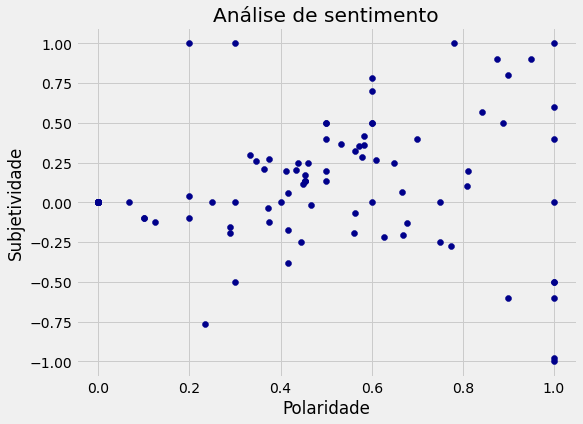

In [47]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df_tweets.shape[0]):
    plt.scatter(df_tweets["Polaridade"][i], df_tweets["Subjetividade"][i], color='darkblue') 
plt.title('Análise de sentimento') 
plt.xlabel('Polaridade') 
plt.ylabel('Subjetividade') 
plt.show()

In [48]:
#% de tweets positivos
ptweets = df_tweets[df_tweets.Analise == 'Positivo']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df_tweets.shape[0]) * 100 , 1)

81.8

In [49]:
#% de tweets negativos
ntweets = df_tweets[df_tweets.Analise == 'Negativo']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df_tweets.shape[0]) * 100, 1)

0.0

In [50]:
df = pd.DataFrame(df_tweets['Analise'].value_counts())

Text(0, 0.5, 'Sentimento')

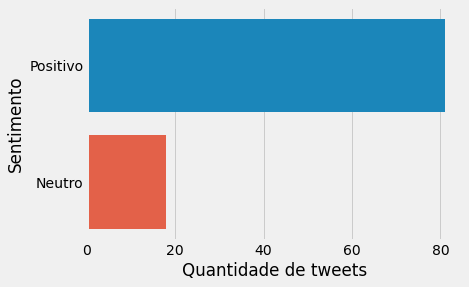

In [51]:
plt.figure()
ax = sns.barplot(x=df['Analise'], y=df.index, data=df_tweets)
ax.set_xlabel('Quantidade de tweets')
ax.set_ylabel('Sentimento')

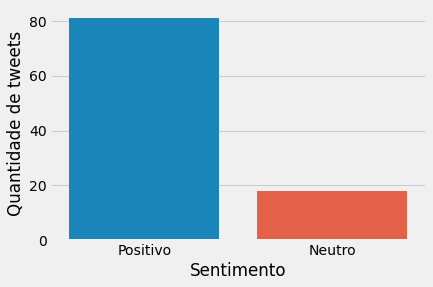

In [52]:
ax = sns.barplot(x=df.index, y=df['Analise'],data=df_tweets,label='Quantidade de Tweets')
ax.set_ylabel('Quantidade de tweets')
ax.set_xlabel('Sentimento');